In [ ]:
from google.colab import drive
import zipfile
import os

# Google Drive'ı bağla
drive.mount('/content/drive')

# ZIP dosyalarının konumları
instagram_zip = "/content/drive/MyDrive/instagram-y__salamat-2025-05-30-YICs3GBH.zip"
telegram_zip = "/content/drive/MyDrive/DataExport_2025-05-30.zip"
facebook_zip = "/content/drive/MyDrive/facebook-yosefsalamat7-30.05.2025-AT6u7LDT.zip"

# Çıkarma klasörleri
extract_path = "/content/social_data"
insta_path = os.path.join(extract_path, "instagram")
tg_path = os.path.join(extract_path, "telegram")
fb_path = os.path.join(extract_path, "facebook")

# ZIP dosyalarını çıkar
os.makedirs(insta_path, exist_ok=True)
os.makedirs(tg_path, exist_ok=True)
os.makedirs(fb_path, exist_ok=True)

with zipfile.ZipFile(instagram_zip, 'r') as zip_ref:
    zip_ref.extractall(insta_path)

with zipfile.ZipFile(telegram_zip, 'r') as zip_ref:
    zip_ref.extractall(tg_path)

with zipfile.ZipFile(facebook_zip, 'r') as zip_ref:
    zip_ref.extractall(fb_path)

print("✅ Tüm dosyalar çıkarıldı.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Tüm dosyalar çıkarıldı.


In [ ]:
import os

fb_root = "/content/social_data/facebook"

for root, dirs, files in os.walk(fb_root):
    level = root.replace(fb_root, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


facebook/
  preferences/
    feed/
      feed.json
      unfollowed_profiles.json
      snooze.json
      reduce.json
      controls.json
    memories/
      your_activity.json
      settings.json
    preferences/
      your_facebook_story_preferences.json
      privacy_settings.json
      language_and_locale.json
      your_watch_settings.json
      notification_settings.json
      reels_preferences.json
      your_device_push_settings.json
      your_post_composer_settings.json
      login_alerts_settings.json
      your_story_highlights.json
      video.json
      your_fundraiser_settings.json
      your_language_translation_settings.json
      your_preferred_categories.json
  logged_information/
    location/
      primary_public_location.json
      last_location.json
      your_privacy_jurisdiction.json
      primary_location.json
      timezone.json
    other_logged_information/
      your_facebook_watch_activity_in_the_last_28_days.json
      facebook_reels_usage_information.jso

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Klasör içeriğini göster
import os
path = "/content/drive/MyDrive/"
print(os.listdir(path))  # burada instagram_data görünüyor mu?


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Getting started.pdf', 'Dekont.pdf', 'IMG_20220309_214021.jpg', 'IMG_20220309_214206.jpg', 'butunleme-listesi.pdf', 'Classroom', 'syllabus.gdoc', 'Odev1-020523.gdoc', 'صورة مفاضلة.jpg', 'كملك مفاضلة.jpg', 'hruyos_sonuc_belgesiD (1).pdf', 'hruyos_sonuc_belgesiD.pdf', 'Ders02_23-Mux-isaretli-pdf (1).gdoc', 'Ders02_23-Mux-isaretli-pdf.gdoc', 'imza (1).pdf', 'imza.pdf', 'Untitled document.gdoc', 'Colab Notebooks', 'YOUSEF_AL SLAMAT_CV.txt', 'domates', 'Strawberry', 'cherry', 'blubbery', 'biber', 'ch3.gdoc', 'DataExport_2025-05-30.zip', 'facebook-yosefsalamat7-30.05.2025-AT6u7LDT.zip', 'instagram-y__salamat-2025-05-30-YICs3GBH.zip', 'instagram_data']


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/instagram-y__salamat-2025-05-30-YICs3GBH.zip"
extract_to = "/content/drive/MyDrive/instagram_data"

# ZIP dosyasını çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ ZIP dosyası açıldı:", extract_to)


✅ ZIP dosyası açıldı: /content/drive/MyDrive/instagram_data


In [ ]:
for root, dirs, files in os.walk(extract_to):
    print(root)
    for file in files:
        print("   └──", file)


/content/drive/MyDrive/instagram_data
/content/drive/MyDrive/instagram_data/your_instagram_activity
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages
   └── secret_conversations.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/omarshikhaleshra_569431074454164
   └── message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/omarshikhaleshra_569431074454164/audio
   └── audioclip17275425020002694_796520939114193.mp4
   └── audioclip17281620360005805_1055960945716525.mp4
   └── audioclip17281620370007059_1491746902216867.mp4
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/bdallh_437056857686521
   └── message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/bdallh_437056857686521/audio
   └── audioclip173352094800010542_2266437417072917.mp4
   └── audioclip1722434

In [ ]:
base_path = "/content/drive/MyDrive/instagram_data/messages/inbox"


In [ ]:
def load_telegram_messages(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    messages = []
    for msg in data['messages']:
        if isinstance(msg.get("date"), str):
            messages.append({
                "date": pd.to_datetime(msg["date"]),
                "from": msg.get("from"),
                "text": msg.get("text") if isinstance(msg["text"], str) else str(msg["text"])
            })

    return pd.DataFrame(messages)


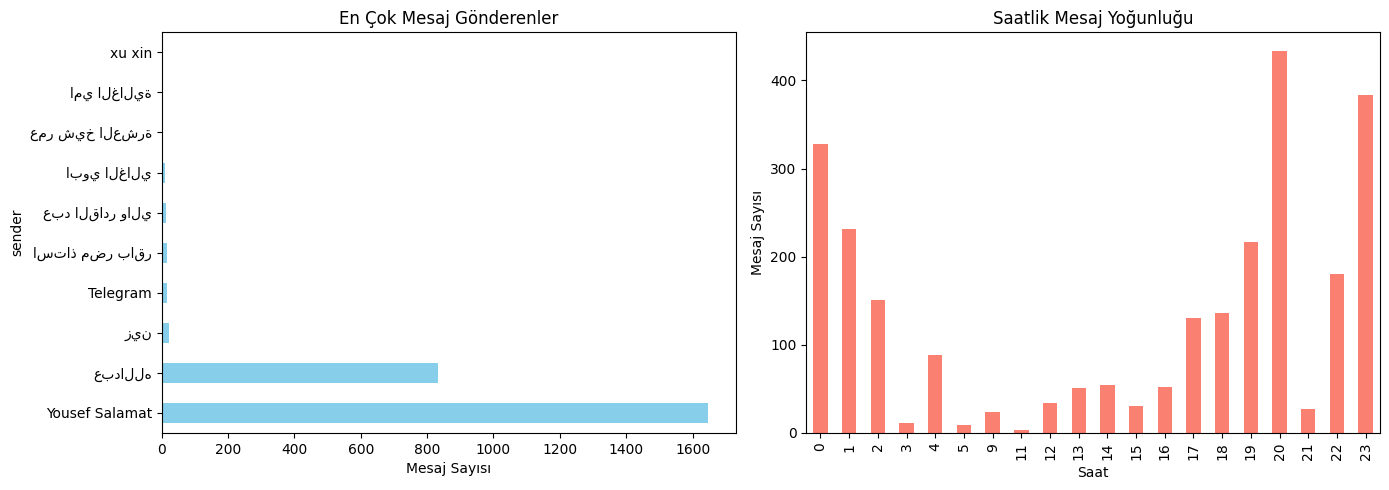

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import os

# Telegram veri dosyası
telegram_path = "/content/social_data/telegram/DataExport_2025-05-30/result.json"

# Dosyayı yükle
with open(telegram_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Mesaj verileri varsa işle
messages = []
for chat in data.get("chats", {}).get("list", []):
    if "messages" in chat:
        for msg in chat["messages"]:
            if isinstance(msg, dict) and "date" in msg and "from" in msg:
                messages.append({
                    "timestamp": msg["date"],
                    "sender": msg["from"],
                    "text": msg.get("text", "")
                })

# DataFrame'e aktar
df = pd.DataFrame(messages)
df["timestamp"] = pd.to_datetime(df["timestamp"])

# En çok mesaj atanlar
top_senders = df["sender"].value_counts().head(10)

# Saatlik mesaj yoğunluğu
df["hour"] = df["timestamp"].dt.hour
hourly_counts = df["hour"].value_counts().sort_index()

# Grafikler
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
top_senders.plot(kind="barh", color="skyblue")
plt.title("En Çok Mesaj Gönderenler")
plt.xlabel("Mesaj Sayısı")

plt.subplot(1, 2, 2)
hourly_counts.plot(kind="bar", color="salmon")
plt.title("Saatlik Mesaj Yoğunluğu")
plt.xlabel("Saat")
plt.ylabel("Mesaj Sayısı")

plt.tight_layout()
plt.show()


In [ ]:
import os

# Klasördeki tüm dosyaları listele
for root, dirs, files in os.walk("/content/social_data/telegram"):
    for name in files:
        print(os.path.join(root, name))


/content/social_data/telegram/DataExport_2025-05-30/result.json
/content/social_data/telegram/DataExport_2025-05-30/chats/chat_001/stickers/AnimatedSticker.tgs
/content/social_data/telegram/DataExport_2025-05-30/chats/chat_013/contacts/contact_1.vcard
/content/social_data/telegram/DataExport_2025-05-30/chats/chat_013/contacts/contact_2.vcard


In [ ]:
import os

for root, dirs, files in os.walk("/content/social_data"):
    for name in files:
        print(os.path.join(root, name))


/content/social_data/facebook/preferences/feed/feed.json
/content/social_data/facebook/preferences/feed/unfollowed_profiles.json
/content/social_data/facebook/preferences/feed/snooze.json
/content/social_data/facebook/preferences/feed/reduce.json
/content/social_data/facebook/preferences/feed/controls.json
/content/social_data/facebook/preferences/memories/your_activity.json
/content/social_data/facebook/preferences/memories/settings.json
/content/social_data/facebook/preferences/preferences/your_facebook_story_preferences.json
/content/social_data/facebook/preferences/preferences/privacy_settings.json
/content/social_data/facebook/preferences/preferences/language_and_locale.json
/content/social_data/facebook/preferences/preferences/your_watch_settings.json
/content/social_data/facebook/preferences/preferences/notification_settings.json
/content/social_data/facebook/preferences/preferences/reels_preferences.json
/content/social_data/facebook/preferences/preferences/your_device_push_set

In [ ]:
import os

for root, dirs, files in os.walk("/content/social_data"):
    for name in files:
        print(os.path.join(root, name))


/content/social_data/facebook/preferences/feed/feed.json
/content/social_data/facebook/preferences/feed/unfollowed_profiles.json
/content/social_data/facebook/preferences/feed/snooze.json
/content/social_data/facebook/preferences/feed/reduce.json
/content/social_data/facebook/preferences/feed/controls.json
/content/social_data/facebook/preferences/memories/your_activity.json
/content/social_data/facebook/preferences/memories/settings.json
/content/social_data/facebook/preferences/preferences/your_facebook_story_preferences.json
/content/social_data/facebook/preferences/preferences/privacy_settings.json
/content/social_data/facebook/preferences/preferences/language_and_locale.json
/content/social_data/facebook/preferences/preferences/your_watch_settings.json
/content/social_data/facebook/preferences/preferences/notification_settings.json
/content/social_data/facebook/preferences/preferences/reels_preferences.json
/content/social_data/facebook/preferences/preferences/your_device_push_set

In [ ]:
# Uyumlu fontu yükle
!apt-get -y install fonts-noto-core fonts-noto-unhinted fonts-noto-cjk


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
fonts-noto-cjk set to manually installed.
fonts-noto-core is already the newest version (20201225-1build1).
fonts-noto-core set to manually installed.
fonts-noto-unhinted is already the newest version (20201225-1build1).
fonts-noto-unhinted set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# Fontun tam yolu
font_path = "/usr/share/fonts/truetype/noto/NotoNaskhArabic-Regular.ttf"
arabic_font = fm.FontProperties(fname=font_path)

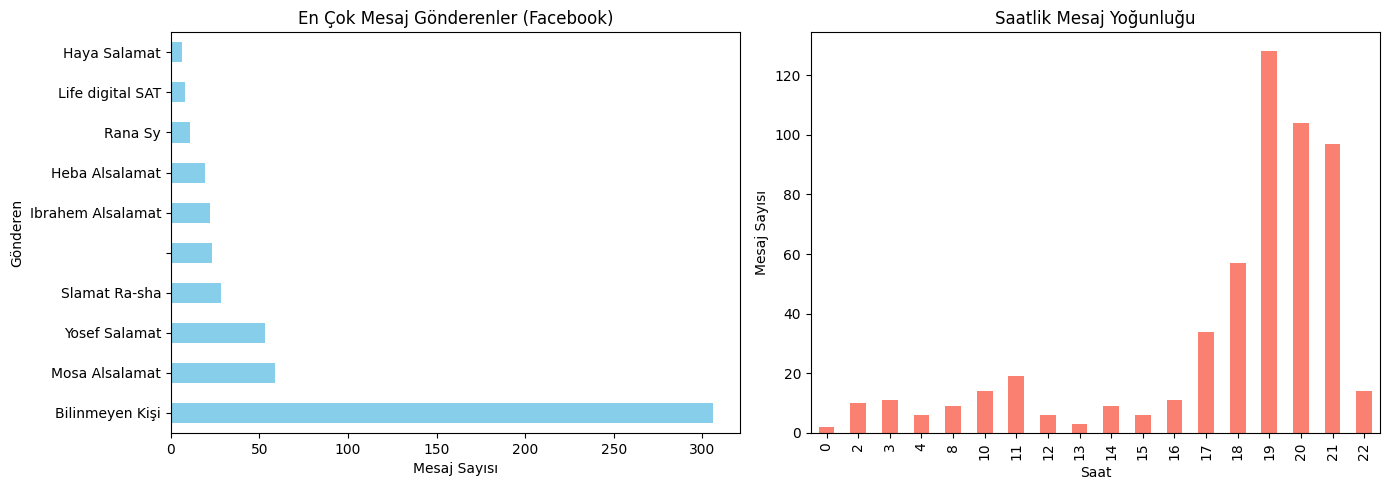

In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Facebook mesaj klasörü
base_path = "/content/social_data/facebook/your_facebook_activity/messages/inbox"

# 2. JSON dosyalarını topla
message_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.startswith("message") and file.endswith(".json"):
            message_files.append(os.path.join(root, file))

# 3. Mesajları oku
all_messages = []
for file_path in message_files:
    with open(file_path, 'r', encoding='utf-8') as f:
        try:
            data = json.load(f)
            for msg in data.get("messages", []):
                if "sender_name" in msg and "timestamp_ms" in msg:
                    all_messages.append({
                        "sender": msg["sender_name"],
                        "timestamp": datetime.fromtimestamp(msg["timestamp_ms"] / 1000),
                        "content": msg.get("content", "")
                    })
        except Exception as e:
            print(f"Hata: {file_path}: {e}")

# 4. DataFrame'e aktar
df = pd.DataFrame(all_messages)

# 5. Bozuk karakterleri düzelt (Arapça vb. için)
def temizle_isim(isim):
    try:
        if any(ord(c) > 127 for c in isim):
            return "Bilinmeyen Kişi"
        return isim
    except:
        return "Bilinmeyen Kişi"

df["sender"] = df["sender"].apply(temizle_isim)
df["hour"] = df["timestamp"].dt.hour

# 6. En çok mesaj atanlar
top_senders = df["sender"].value_counts().head(10)

# 7. Saatlik mesaj yoğunluğu
hourly_counts = df["hour"].value_counts().sort_index()

# 8. Grafik çiz
plt.figure(figsize=(14, 5))

# Sol grafik: En çok mesaj gönderenler
plt.subplot(1, 2, 1)
top_senders.plot(kind="barh", color="skyblue")
plt.title("En Çok Mesaj Gönderenler (Facebook)")
plt.xlabel("Mesaj Sayısı")
plt.ylabel("Gönderen")

# Sağ grafik: Saatlik mesaj yoğunluğu
plt.subplot(1, 2, 2)
hourly_counts.plot(kind="bar", color="salmon")
plt.title("Saatlik Mesaj Yoğunluğu")
plt.xlabel("Saat")
plt.ylabel("Mesaj Sayısı")

plt.tight_layout()
plt.show()



In [ ]:
import os

for root, dirs, files in os.walk("/content/social_data/instagram"):
    for name in files:
        print(os.path.join(root, name))


/content/social_data/instagram/preferences/settings/use_cross-app_messaging.json
/content/social_data/instagram/preferences/settings/notification_preferences.json
/content/social_data/instagram/preferences/settings/comments_allowed_from.json
/content/social_data/instagram/preferences/your_topics/recommended_topics.json
/content/social_data/instagram/logged_information/recent_searches/word_or_phrase_searches.json
/content/social_data/instagram/logged_information/recent_searches/profile_searches.json
/content/social_data/instagram/connections/followers_and_following/following.json
/content/social_data/instagram/connections/followers_and_following/followers_1.json
/content/social_data/instagram/connections/followers_and_following/recently_unfollowed_profiles.json
/content/social_data/instagram/connections/followers_and_following/recent_follow_requests.json
/content/social_data/instagram/connections/followers_and_following/follow_requests_you've_received.json
/content/social_data/instagram

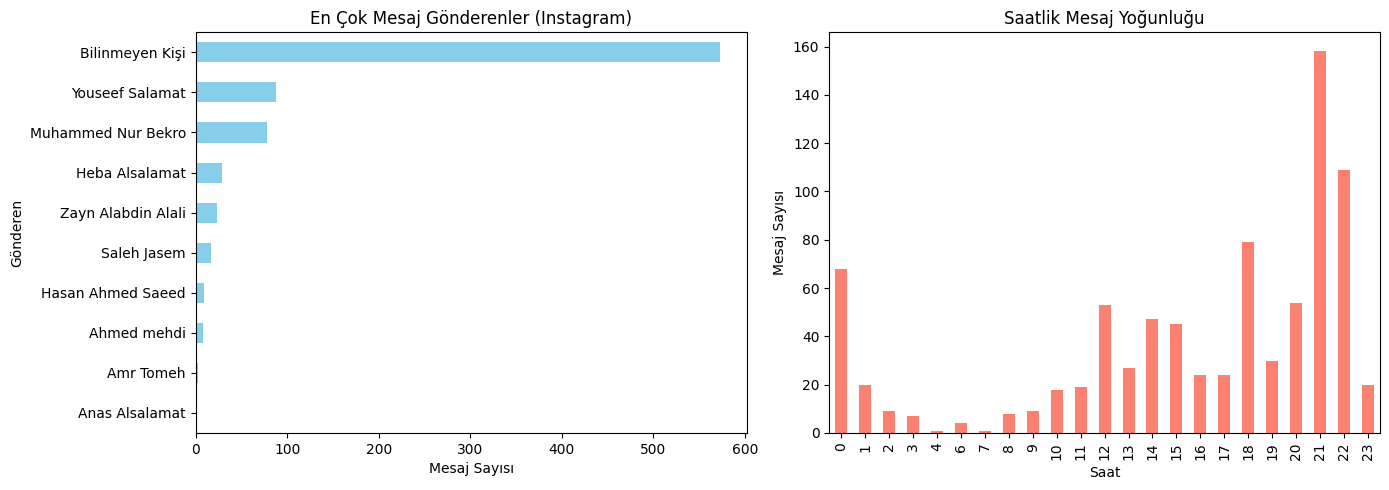

In [ ]:
import os
import json
from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Mesaj klasörleri
base_dirs = [
    "/content/social_data/instagram/your_instagram_activity/messages/inbox",
    "/content/social_data/instagram/your_instagram_activity/messages/message_requests"
]

all_messages = []

# 2. Tüm message_1.json dosyalarını oku
for base_dir in base_dirs:
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file == "message_1.json":
                path = os.path.join(root, file)
                with open(path, "r", encoding="utf-8") as f:
                    try:
                        data = json.load(f)
                        all_messages.append(data)
                    except Exception as e:
                        print(f"Hata: {path} - {e}")

# 3. Mesajları listele
message_data = []

for conversation in all_messages:
    participants = [p['name'] for p in conversation.get("participants", [])]
    for msg in conversation.get("messages", []):
        sender = msg.get("sender_name")
        timestamp_ms = msg.get("timestamp_ms")
        if sender and timestamp_ms:
            dt = datetime.fromtimestamp(timestamp_ms / 1000)
            message_data.append({
                "sender": sender,
                "datetime": dt,
                "hour": dt.hour
            })

df = pd.DataFrame(message_data)

# 4. Bozuk karakterleri düzelt (Arapça vb.)
def temizle_isim(isim):
    try:
        if any(ord(c) > 127 for c in isim):
            return "Bilinmeyen Kişi"
        return isim
    except:
        return "Bilinmeyen Kişi"

df["sender"] = df["sender"].apply(temizle_isim)

# 5. Eğer hiç mesaj yoksa uyarı ver
if df.empty:
    print("Hiç mesaj bulunamadı.")
else:
    # En çok mesaj atanlar
    sender_counts = df["sender"].value_counts().head(10)

    # Saatlik mesaj yoğunluğu
    hourly_counts = df["hour"].value_counts().sort_index()

    # 6. Görselleştirme
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Sol grafik: En çok mesaj gönderenler
    sender_counts.plot(kind="barh", ax=axes[0], color="skyblue")
    axes[0].set_title("En Çok Mesaj Gönderenler (Instagram)")
    axes[0].set_xlabel("Mesaj Sayısı")
    axes[0].set_ylabel("Gönderen")
    axes[0].invert_yaxis()

    # Sağ grafik: Saatlik mesaj yoğunluğu
    hourly_counts.plot(kind="bar", ax=axes[1], color="salmon")
    axes[1].set_title("Saatlik Mesaj Yoğunluğu")
    axes[1].set_xlabel("Saat")
    axes[1].set_ylabel("Mesaj Sayısı")

    plt.tight_layout()
    plt.show()


In [ ]:
main_path = "/content/drive/MyDrive/instagram_data"
for root, dirs, files in os.walk(main_path):
    for file in files:
        if file.endswith(".json") or file.endswith(".html"):
            print(os.path.join(root, file))


/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/secret_conversations.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/omarshikhaleshra_569431074454164/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/bdallh_437056857686521/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/youseefsalamat_1228569905201875/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/muhammednurbekro_446445570080983/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/muhammedahmedsaid_1485262129535815/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/zaynalabdinalali_1312380763487455/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/muhamedhuseyinhaftar_805028024222734/message_1.json
/content/drive/MyDrive/instagram

                            Katılımcılar  Mesaj Sayısı
0       Bilinmeyen Kişi, Bilinmeyen Kişi           350
2    Muhammed Nur Bekro, Bilinmeyen Kişi           159
1       Youseef Salamat, Bilinmeyen Kişi           148
3    Zayn Alabdin Alali, Bilinmeyen Kişi            43
15          Saleh Jasem, Bilinmeyen Kişi            33
13       Heba Alsalamat, Bilinmeyen Kişi            31
12    Hasan Ahmed Saeed, Bilinmeyen Kişi            29
6           Ahmed mehdi, Bilinmeyen Kişi            12
8        Anas Alsalamat, Bilinmeyen Kişi             9
7             Amr Tomeh, Bilinmeyen Kişi             5
14      Mohammad Khamis, Bilinmeyen Kişi             3
10                 Fedi, Bilinmeyen Kişi             3
4          Abobakr Amer, Bilinmeyen Kişi             3
5      Ahmed Abdulrahim, Bilinmeyen Kişi             1
9                DANYAL, Bilinmeyen Kişi             1
11  Hamza meshaal (^_^), Bilinmeyen Kişi             1
16           osama jabi, Bilinmeyen Kişi             1
17        

<Figure size 1000x600 with 0 Axes>

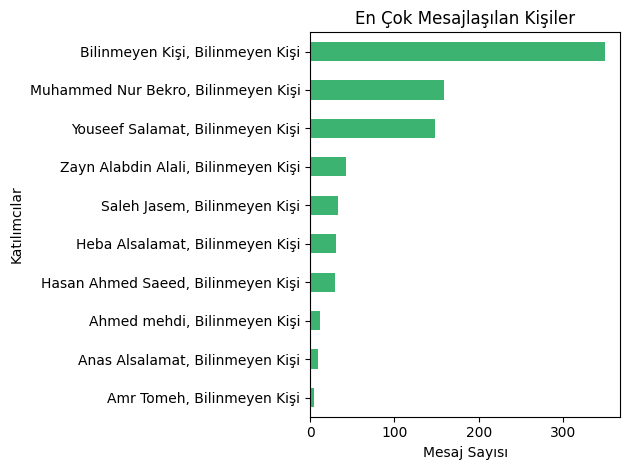

In [ ]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

main_path = "/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/"
message_counts = {}

# Karakterleri temizlemek için yardımcı fonksiyon
def temizle_isim(isim):
    try:
        if any(ord(c) > 127 for c in isim):
            return "Bilinmeyen Kişi"
        return isim
    except:
        return "Bilinmeyen Kişi"

# message_1.json dosyalarını oku
for root, dirs, files in os.walk(main_path):
    for file in files:
        if file == "message_1.json":
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                participants_list = data.get("participants", [])
                cleaned_participants = [temizle_isim(p["name"]) for p in participants_list if "name" in p]
                participants = ", ".join(cleaned_participants)
                num_messages = len(data.get("messages", []))
                message_counts[participants] = message_counts.get(participants, 0) + num_messages

# DataFrame'e aktar
df = pd.DataFrame(list(message_counts.items()), columns=["Katılımcılar", "Mesaj Sayısı"])
df = df.sort_values(by="Mesaj Sayısı", ascending=False)

# Tabloyu yazdır
print(df)

# Grafik çiz
plt.figure(figsize=(10, 6))
df.head(10).plot(kind='barh', x="Katılımcılar", y="Mesaj Sayısı", color="mediumseagreen", legend=False)
plt.title("En Çok Mesajlaşılan Kişiler")
plt.xlabel("Mesaj Sayısı")
plt.ylabel("Katılımcılar")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# CSV olarak kaydet (isteğe bağlı)
# df.to_csv("instagram_mesaj_sayilari.csv", index=False)




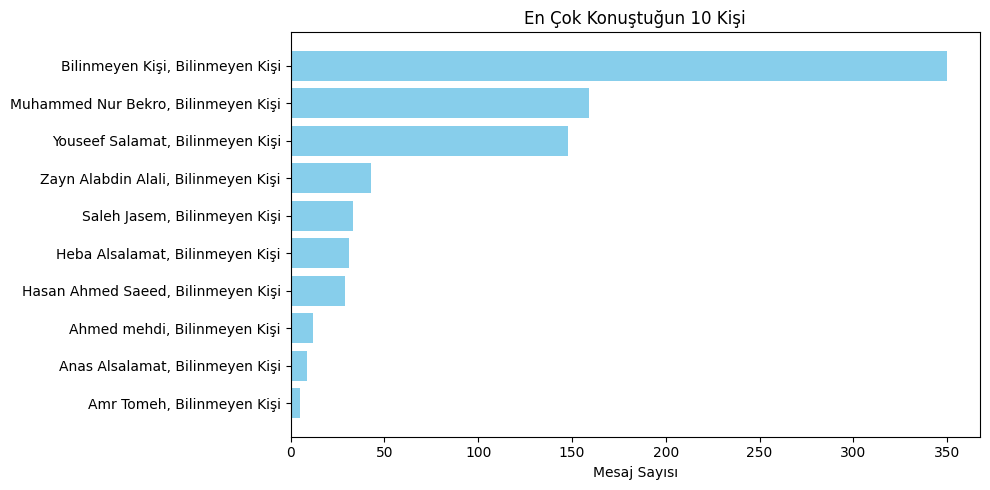

In [ ]:
import matplotlib.pyplot as plt

top_n = 10
top_items = sorted(message_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
names, counts = zip(*top_items)

plt.figure(figsize=(10, 5))
plt.barh(names, counts, color='skyblue')
plt.xlabel("Mesaj Sayısı")
plt.title("En Çok Konuştuğun 10 Kişi")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


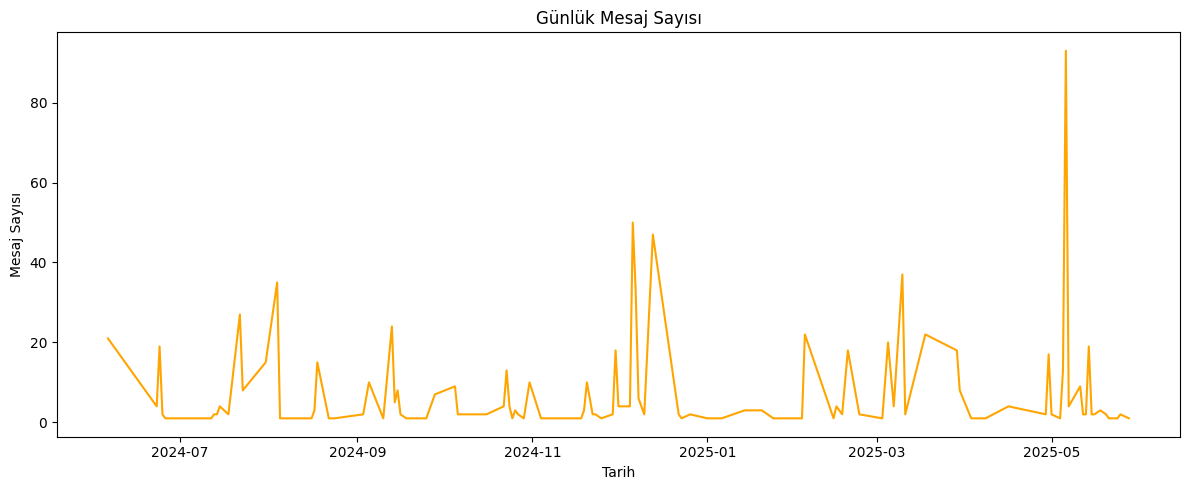

In [ ]:
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

message_dates = []

for root, dirs, files in os.walk(main_path):
    for file in files:
        if file == "message_1.json":
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                for msg in data.get("messages", []):
                    timestamp_ms = msg.get("timestamp_ms")
                    if timestamp_ms:
                        date = datetime.fromtimestamp(timestamp_ms / 1000).date()
                        message_dates.append(date)

# Günlük mesaj sayısını say
daily_counts = Counter(message_dates)
dates = sorted(daily_counts.keys())
counts = [daily_counts[d] for d in dates]

# Grafikle göster
plt.figure(figsize=(12, 5))
plt.plot(dates, counts, color='orange')
plt.title("Günlük Mesaj Sayısı")
plt.xlabel("Tarih")
plt.ylabel("Mesaj Sayısı")
plt.tight_layout()
plt.show()


In [ ]:
import os, json, pandas as pd, re

main_path = "/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/"
message_counts = {}

def clean_name(name):
    return re.sub(r'[^\x00-\x7F]+', '', name)

for root, dirs, files in os.walk(main_path):
    for file in files:
        if file == "message_1.json":
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                participants_list = data.get("participants", [])
                if participants_list:
                    name = clean_name(participants_list[0]["name"])
                    num_messages = len(data.get("messages", []))
                    message_counts[name] = message_counts.get(name, 0) + num_messages

# DataFrame ve tablo
df = pd.DataFrame(list(message_counts.items()), columns=["Kişi", "Mesaj Sayısı"])
df = df.sort_values(by="Mesaj Sayısı", ascending=False)
df.head(10)


,Kişi,Mesaj Sayısı
4,,169
3,Muhammed Nur Bekro,159
2,Youseef Salamat,148
1,,113
5,Zayn Alabdin Alali,43
0,Omar Shikh Al-Eshra,36
18,Saleh Jasem,33
16,Heba Alsalamat,31
15,Hasan Ahmed Saeed,29
6,Muhamed Hseyin Haftar,15


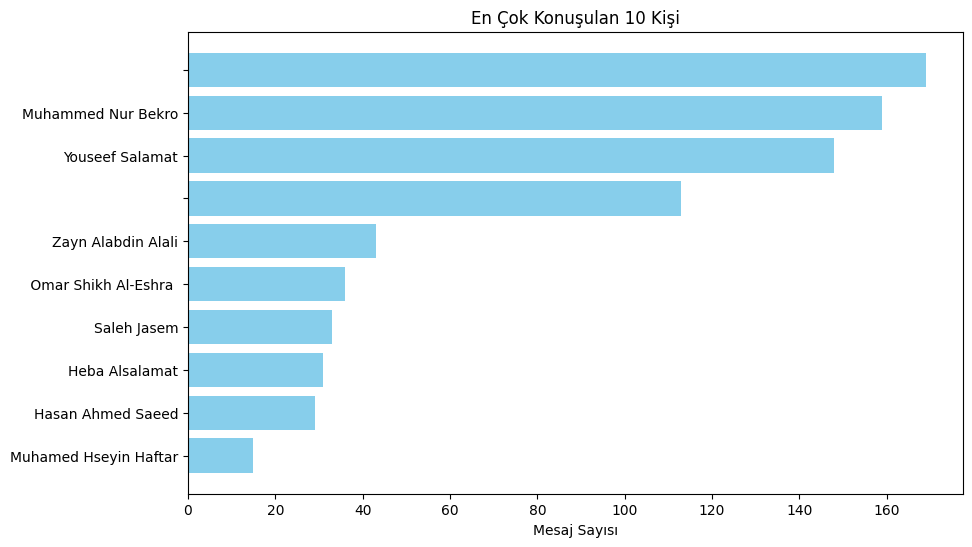

In [ ]:
import matplotlib.pyplot as plt

top_users = dict(sorted(message_counts.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure(figsize=(10,6))
plt.barh(list(top_users.keys()), list(top_users.values()), color='skyblue')
plt.xlabel("Mesaj Sayısı")
plt.title("En Çok Konuşulan 10 Kişi")
plt.gca().invert_yaxis()
plt.show()


<ipython-input-42-2022194685>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")
<ipython-input-42-2022194685>:46: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


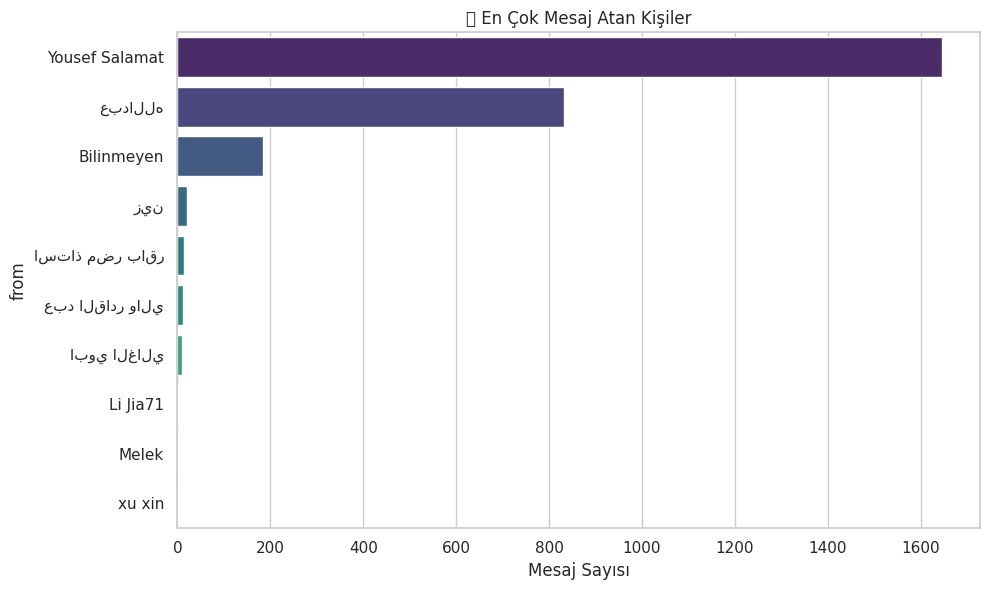

<ipython-input-42-2022194685>:59: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


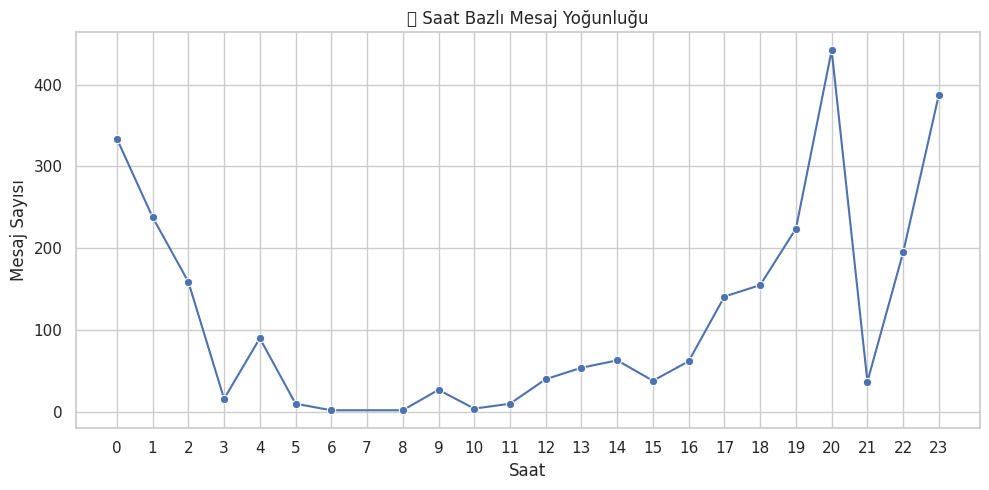

<ipython-input-42-2022194685>:71: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


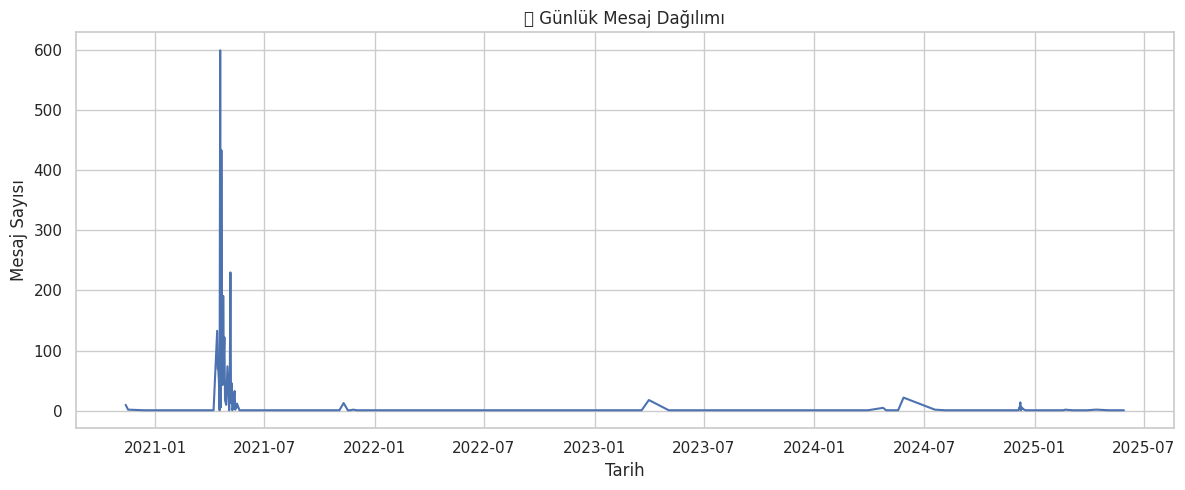

<ipython-input-42-2022194685>:80: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


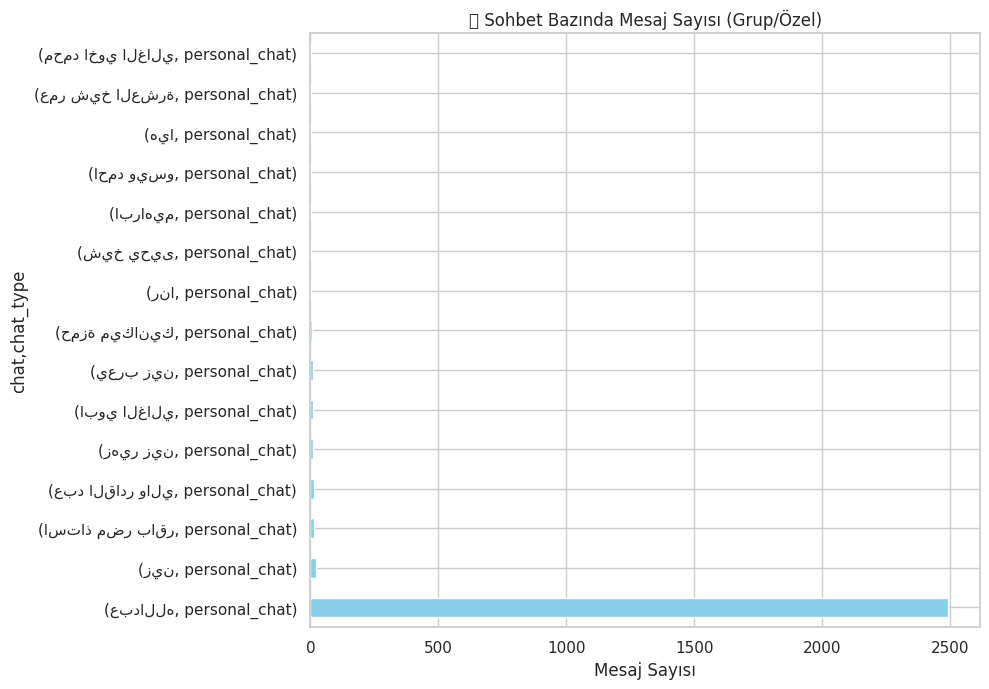

🏆 En aktif sohbet: عبدالله (2493 mesaj)
👑 En aktif kişi: Yousef Salamat (1645 mesaj)


<ipython-input-42-2022194685>:97: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


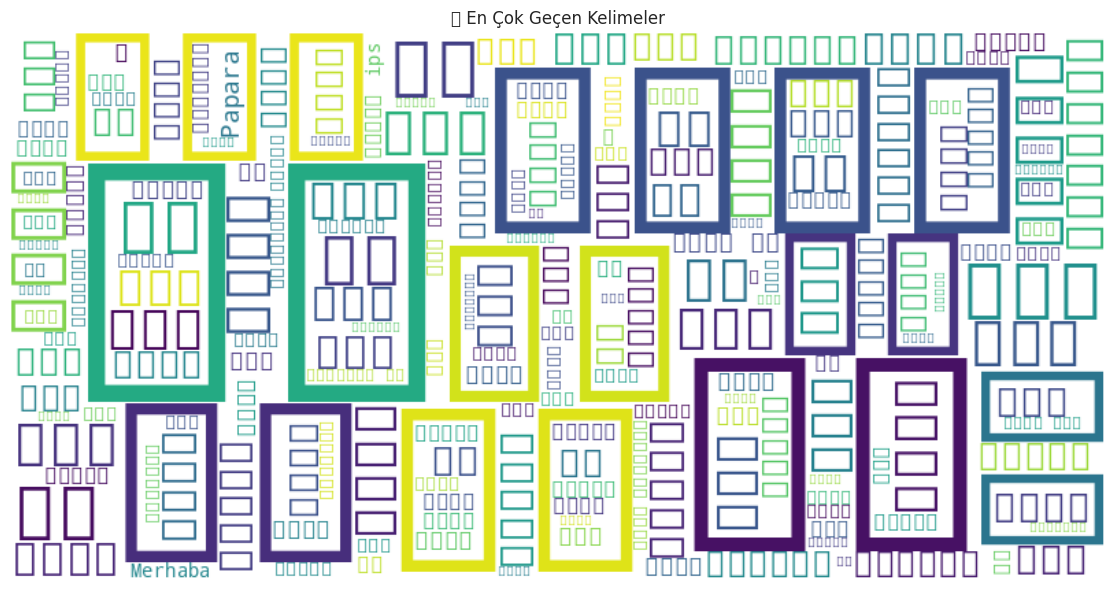

In [ ]:
# Gerekli kütüphaneler
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os

# Tema ayarı
sns.set(style="whitegrid")
plt.rcParams["font.size"] = 10

# === 1. JSON Dosyasını Yükle ===
with open("/content/social_data/telegram/DataExport_2025-05-30/result.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# === 2. Mesajları Listele ===
all_messages = []
for chat in data["chats"]["list"]:
    name = chat.get("name", "Bilinmeyen")
    chat_type = chat.get("type", "private_group")
    messages = chat.get("messages", [])
    for msg in messages:
        if isinstance(msg, dict) and "text" in msg:
            all_messages.append({
                "date": msg.get("date"),
                "from": msg.get("from", "Bilinmeyen"),
                "text": msg.get("text"),
                "chat": name,
                "chat_type": chat_type
            })

df = pd.DataFrame(all_messages)
df["date"] = pd.to_datetime(df["date"])

# === 3. Temizlik: Sadece yazılı mesajlar ===
df = df[df["text"].apply(lambda x: isinstance(x, str))]

# === 4. EN ÇOK MESAJ ATANLAR ===
top_users = df["from"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")
plt.title("👤 En Çok Mesaj Atan Kişiler")
plt.xlabel("Mesaj Sayısı")
plt.tight_layout()
plt.show()

# === 5. SAAT BAZLI YOĞUNLUK ===
df["hour"] = df["date"].dt.hour
hourly = df["hour"].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly.index, y=hourly.values, marker="o")
plt.title("⏰ Saat Bazlı Mesaj Yoğunluğu")
plt.xlabel("Saat")
plt.ylabel("Mesaj Sayısı")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. GÜNLÜK DAĞILIM ===
df["day"] = df["date"].dt.date
daily = df["day"].value_counts().sort_index()
plt.figure(figsize=(12,5))
daily.plot()
plt.title("📅 Günlük Mesaj Dağılımı")
plt.ylabel("Mesaj Sayısı")
plt.xlabel("Tarih")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. SOHBET TİPİNE GÖRE MESAJLAR ===
grouped = df.groupby(["chat", "chat_type"]).size().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,7))
grouped.plot(kind="barh", color="skyblue")
plt.title("💬 Sohbet Bazında Mesaj Sayısı (Grup/Özel)")
plt.xlabel("Mesaj Sayısı")
plt.tight_layout()
plt.show()

# === 8. EN AKTİF KİŞİ / GRUP ===
top_chat = df["chat"].value_counts().head(1)
top_sender = df["from"].value_counts().head(1)
print(f"🏆 En aktif sohbet: {top_chat.index[0]} ({top_chat.values[0]} mesaj)")
print(f"👑 En aktif kişi: {top_sender.index[0]} ({top_sender.values[0]} mesaj)")

# === 9. EN SIK KULLANILAN KELİMELER (isteğe bağlı) ===
from wordcloud import WordCloud
all_text = " ".join(df["text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("📝 En Çok Geçen Kelimeler")
plt.tight_layout()
plt.show()


In [ ]:
!pip install pandas matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()  # ZIP dosyasını buradan yükle


Saving DataExport_2025-05-30.zip to DataExport_2025-05-30.zip


In [ ]:
import zipfile
import json
import pandas as pd

# ZIP içinden result.json çıkar
with zipfile.ZipFile(next(iter(uploaded)), 'r') as archive:
    with archive.open("DataExport_2025-05-30/result.json") as f:
        data = json.load(f)

# Mesajları ayrıştır
all_messages = []
for chat in data["chats"]["list"]:
    name = chat.get("name", "Bilinmeyen")
    chat_type = chat.get("type", "private_group")
    messages = chat.get("messages", [])
    for msg in messages:
        if isinstance(msg, dict) and "text" in msg:
            all_messages.append({
                "date": msg.get("date"),
                "from": msg.get("from", "Bilinmeyen"),
                "text": msg.get("text"),
                "chat": name,
                "chat_type": chat_type
            })

# DataFrame'e aktar
df = pd.DataFrame(all_messages)
df["date"] = pd.to_datetime(df["date"])
df = df[df["text"].apply(lambda x: isinstance(x, str))]


In [ ]:
# Arapça -> Türkçe isim haritası
translation_map = {
    "عبدالله": "Abdullah",
    "زين": "Zeynep",
    "استاذ مضر باقر": "Öğrt. Mudar Bakır",
    "عبد القادر والي": "Abdulkadir Vali",
    "زهير زين": "Züheyr Zeyn",
    "يعرب زين": "Ya'rub Zeyn",
    "ابوي الغالي": "Değerli Babam",
    "حمزة ميكانيك": "Hamza Mekanik",
    "رنا": "Rana",
    "ابراهيم": "İbrahim",
    "عمر شيخ العشرة": "Ömer Şeyh",
    "محمد اخوي الغالي": "Muhammed Kardeşim",
    "شيخ يحيى": "Şeyh Yahya",
    "هيا": "Haya",
    "احمد ويسو": "Ahmed Weiso"
}

df["chat_tr"] = df["chat"].apply(lambda x: translation_map.get(x, x))


<ipython-input-57-2707252693>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chats_tr.values, y=top_chats_tr.index, palette="crest")
<ipython-input-57-2707252693>:10: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


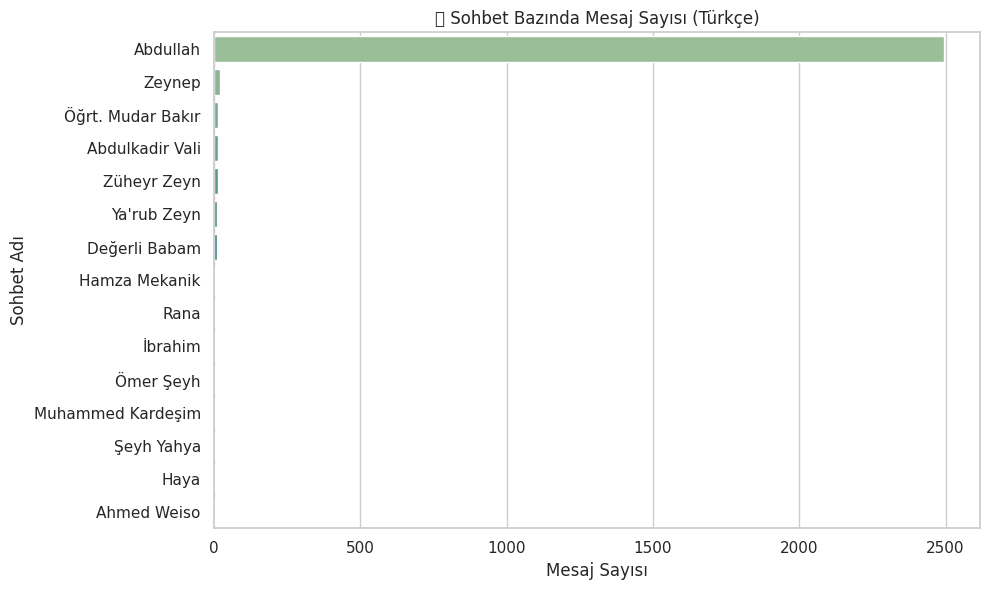

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_chats_tr = df["chat_tr"].value_counts().head(15)
sns.barplot(x=top_chats_tr.values, y=top_chats_tr.index, palette="crest")
plt.xlabel("Mesaj Sayısı")
plt.ylabel("Sohbet Adı")
plt.title("📌 Sohbet Bazında Mesaj Sayısı (Türkçe)")
plt.tight_layout()
plt.show()


<ipython-input-58-439843096>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="saat", data=df, palette="flare")
<ipython-input-58-439843096>:14: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


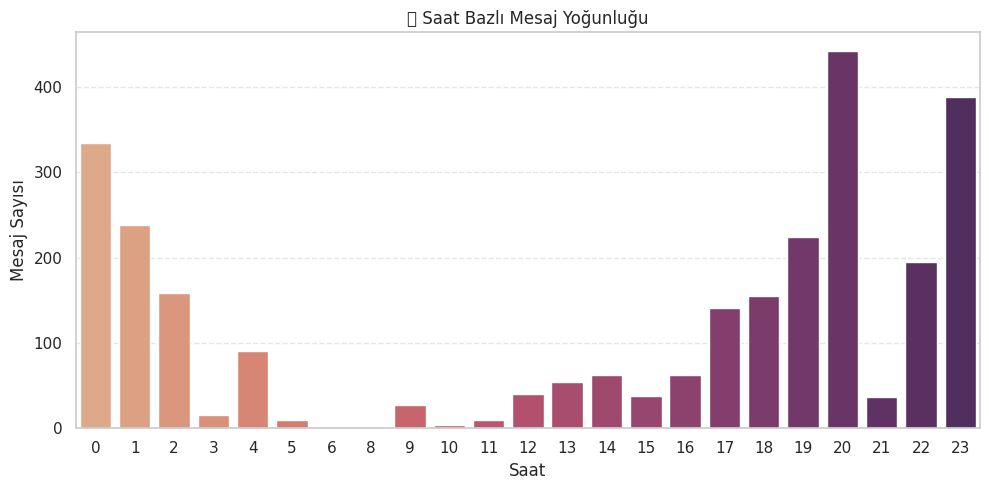

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Saat sütununu oluştur
df["saat"] = df["date"].dt.hour

# Saatlik dağılım
plt.figure(figsize=(10, 5))
sns.countplot(x="saat", data=df, palette="flare")
plt.title("⏰ Saat Bazlı Mesaj Yoğunluğu")
plt.xlabel("Saat")
plt.ylabel("Mesaj Sayısı")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-59-1482673066>:13: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


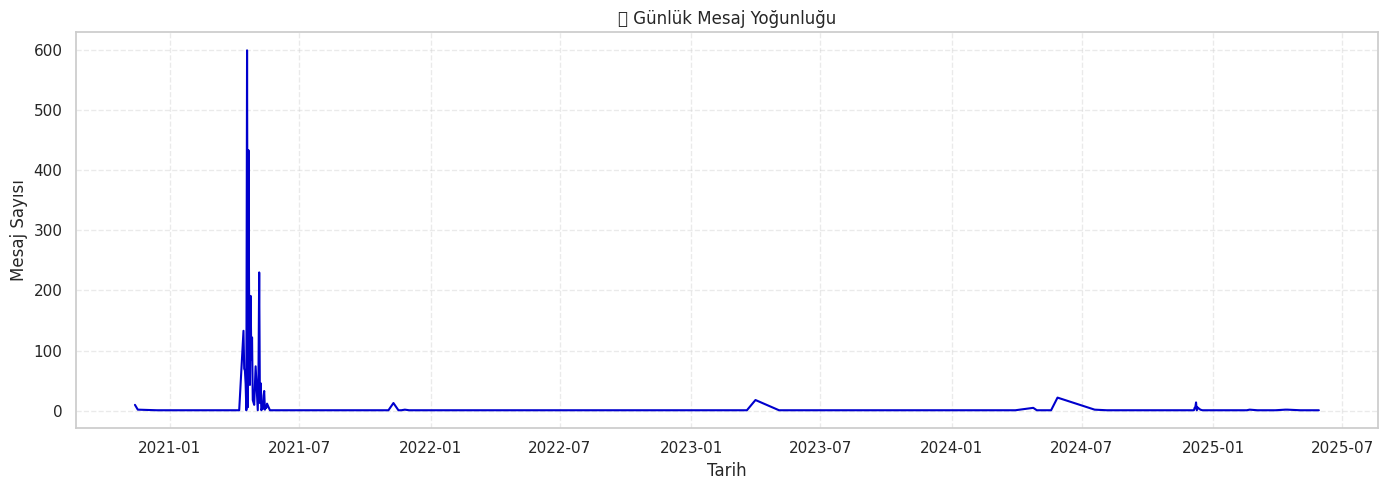

In [ ]:
# Tarih sütununu oluştur (sadece gün)
df["gun"] = df["date"].dt.date

# Günlük mesaj sayısı
gunluk = df.groupby("gun").size()

plt.figure(figsize=(14, 5))
gunluk.plot(kind="line", color="mediumblue")
plt.title("📅 Günlük Mesaj Yoğunluğu")
plt.xlabel("Tarih")
plt.ylabel("Mesaj Sayısı")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
# Kişi adlarını Türkçeye çeviren sözlük (chat ile aynı)
isim_cevirmap = {
    "عبدالله": "Abdullah",
    "زين": "Zeynep",
    "استاذ مضر باقر": "Öğrt. Mudar Bakır",
    "عبد القادر والي": "Abdulkadir Vali",
    "زهير زين": "Züheyr Zeyn",
    "يعرب زين": "Ya'rub Zeyn",
    "ابوي الغالي": "Değerli Babam",
    "حمزة ميكانيك": "Hamza Mekanik",
    "رنا": "Rana",
    "ابراهيم": "İbrahim",
    "عمر شيخ العشرة": "Ömer Şeyh",
    "محمد اخوي الغالي": "Muhammed Kardeşim",
    "شيخ يحيى": "Şeyh Yahya",
    "هيا": "Haya",
    "احمد ويسو": "Ahmed Weiso"
}

# Yeni sütun: Türkçeleştirilmiş gönderen adı
df["from_tr"] = df["from"].apply(lambda x: isim_cevirmap.get(x, x))


<ipython-input-62-3204702886>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kisiler_tr.values, y=top_kisiler_tr.index, palette="viridis")
<ipython-input-62-3204702886>:9: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


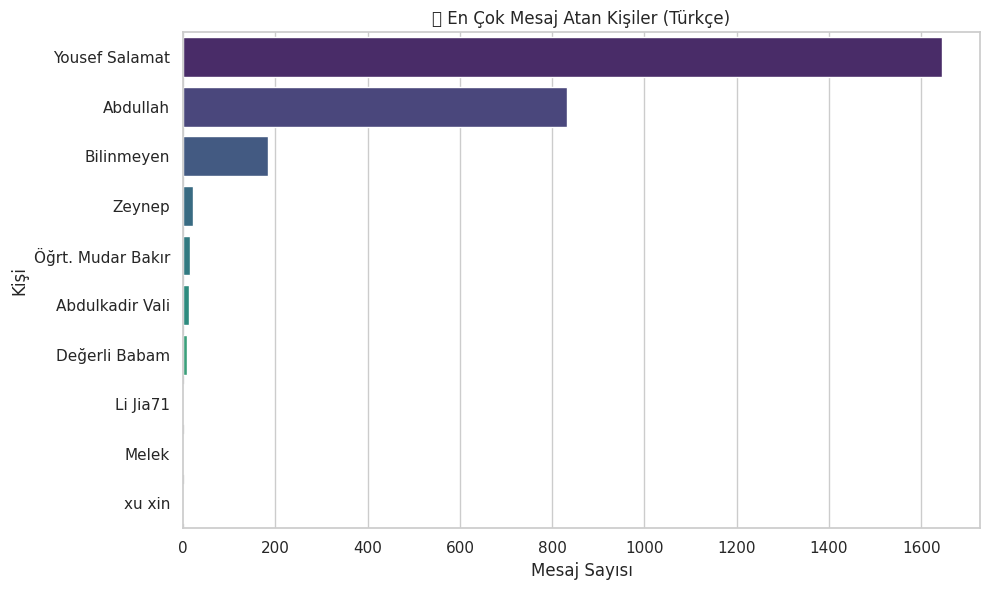

In [ ]:
# Türkçeleştirilmiş göndericiye göre say
plt.figure(figsize=(10, 6))
top_kisiler_tr = df["from_tr"].value_counts().head(10)

sns.barplot(x=top_kisiler_tr.values, y=top_kisiler_tr.index, palette="viridis")
plt.title("👥 En Çok Mesaj Atan Kişiler (Türkçe)")
plt.xlabel("Mesaj Sayısı")
plt.ylabel("Kişi")
plt.tight_layout()
plt.show()


Lütfen Facebook ZIP dosyanı yükle (örn: facebook-...zip)


Saving facebook-yosefsalamat7-30.05.2025-AT6u7LDT.zip to facebook-yosefsalamat7-30.05.2025-AT6u7LDT.zip
ZIP dosyası çıkarıldı.


/tmp/ipython-input-8-2096472661.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_post_counts.index, y=yearly_post_counts.values, palette='viridis')


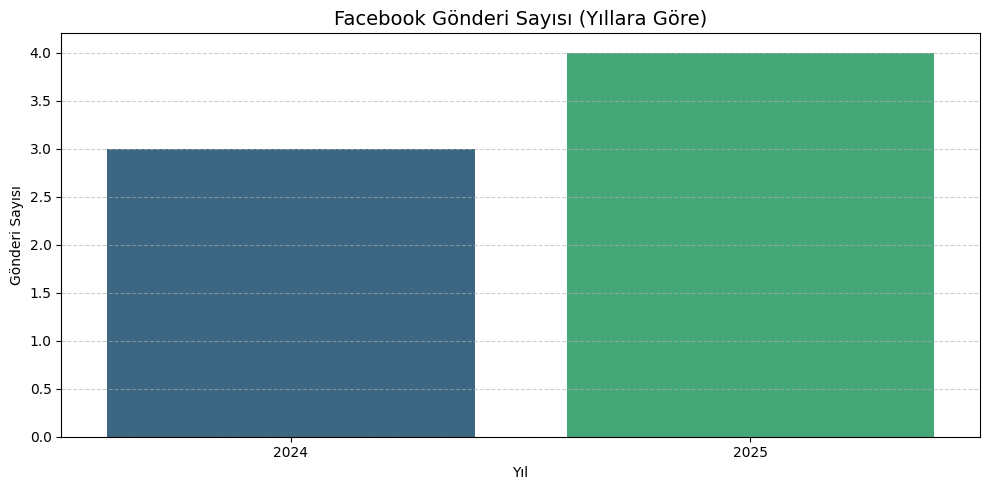

In [ ]:
# 1. Gerekli kütüphaneler
import zipfile, os, json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 2. Kullanıcıdan ZIP dosyasını yüklemesini iste
print("Lütfen Facebook ZIP dosyanı yükle (örn: facebook-...zip)")
uploaded = files.upload()

# 3. Yüklenen dosya adını al
zip_filename = list(uploaded.keys())[0]
zip_path = f"/content/{zip_filename}"
extract_path = "/content/facebook_extracted"

# 4. ZIP dosyasını çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP dosyası çıkarıldı.")

# 5. Gönderi dosyasının yolunu tanımla
posts_file_path = os.path.join(
    extract_path,
    "your_facebook_activity/posts/your_posts__check_ins__photos_and_videos_1.json"
)

# 6. JSON verisini oku
with open(posts_file_path, 'r', encoding='utf-8') as f:
    posts_data = json.load(f)

# 7. Gönderileri işle
posts_list = []
for post in posts_data:
    timestamp = post.get("timestamp")
    text = post.get("data", [{}])[0].get("post", "")
    attachments = post.get("attachments", [])

    if timestamp:
        dt = datetime.fromtimestamp(timestamp)
        year = dt.year
        date_str = dt.strftime("%Y-%m-%d %H:%M:%S")
    else:
        year = None
        date_str = None

    posts_list.append({
        "date": date_str,
        "year": year,
        "text": text,
        "attachment_count": len(attachments)
    })

# 8. DataFrame oluştur
posts_df = pd.DataFrame(posts_list)

# 9. Yıllara göre gönderi sayısı grafiği
yearly_post_counts = posts_df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_post_counts.index, y=yearly_post_counts.values, palette='viridis')
plt.title('Facebook Gönderi Sayısı (Yıllara Göre)', fontsize=14)
plt.xlabel('Yıl')
plt.ylabel('Gönderi Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import glob

# 1. Mesaj klasörlerini bul
message_dirs = glob.glob(os.path.join(
    extract_path,
    "your_facebook_activity/messages/e2ee_cutover/*"
))

message_summary = []

# 2. Her klasördeki mesaj_1.json dosyasını oku
for msg_dir in message_dirs:
    file_path = os.path.join(msg_dir, "message_1.json")
    if not os.path.isfile(file_path):
        continue

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            messages = json.load(f)
    except:
        continue

    # 3. Kişi adını klasör isminden al
    person_name = os.path.basename(msg_dir).split("_")[0]

    # 4. Mesaj tarihlerini al
    count = 0
    years = []
    for m in messages.get("messages", []):
        ts = m.get("timestamp_ms")
        if ts:
            dt = datetime.fromtimestamp(ts / 1000)
            years.append(dt.year)
            count += 1

    # 5. Özet listeye ekle
    if count > 0:
        summary = {
            "person": person_name,
            "message_count": count,
            "first_year": min(years),
            "last_year": max(years)
        }
        message_summary.append(summary)

# 6. DataFrame oluştur
msg_df = pd.DataFrame(message_summary).sort_values(by="message_count", ascending=False)
msg_df.reset_index(drop=True, inplace=True)

# 7. En çok mesaj atılan ilk 10 kişi
msg_df.head(10)


,person,message_count,first_year,last_year
0,122112918818330229,13,2024,2024
1,adnansalamat,8,2024,2024
2,yrbalslamat,6,2024,2024
3,mhmdalahmdkwsa,3,2025,2025
4,hebaalsalamat,3,2024,2024
5,ibrahemalsalamat,2,2024,2024
6,anasalsalamat,2,2025,2025
7,modarmohammedbaker,2,2025,2025
8,amrrdy,2,2025,2025
9,abwbdallhalslamat,2,2024,2024


/tmp/ipython-input-11-3658476938.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_df, x="Yıl", y="Mesaj Sayısı", palette="rocket")


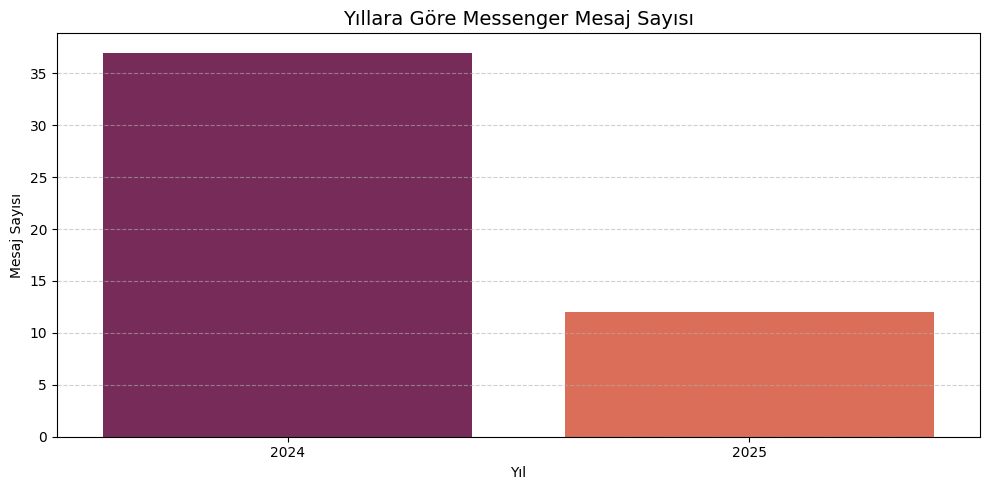

In [ ]:
# Tüm yılları toplayalım
year_distribution = {}

# Her mesaj dosyasını yeniden işleyip yıl sayısı çıkaralım
for msg_dir in message_dirs:
    file_path = os.path.join(msg_dir, "message_1.json")
    if not os.path.isfile(file_path):
        continue

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            messages = json.load(f)
    except:
        continue

    for m in messages.get("messages", []):
        ts = m.get("timestamp_ms")
        if ts:
            dt = datetime.fromtimestamp(ts / 1000)
            y = dt.year
            year_distribution[y] = year_distribution.get(y, 0) + 1

# DataFrame'e çevir
year_df = pd.DataFrame(sorted(year_distribution.items()), columns=["Yıl", "Mesaj Sayısı"])

# Grafik
plt.figure(figsize=(10,5))
sns.barplot(data=year_df, x="Yıl", y="Mesaj Sayısı", palette="rocket")
plt.title("Yıllara Göre Messenger Mesaj Sayısı", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


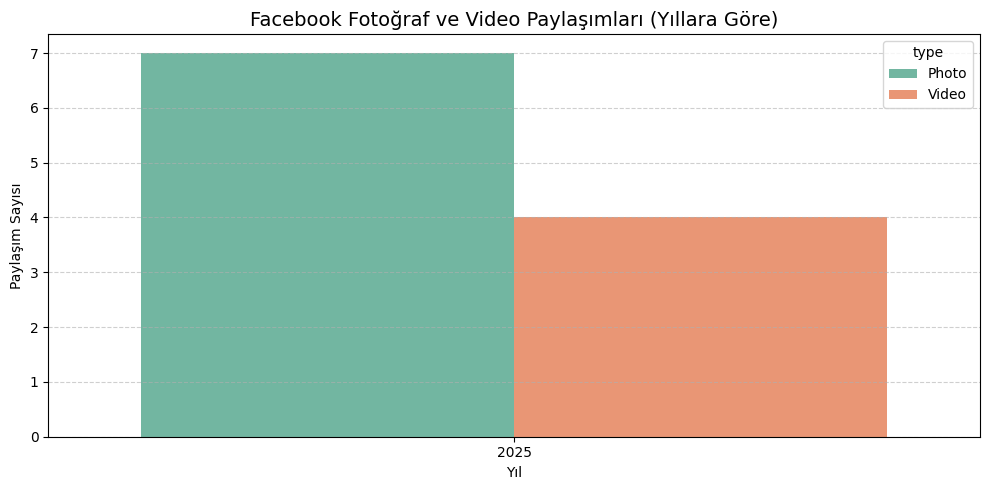

In [ ]:
import os, json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Yolları güncelle
base_path = "/content/facebook_extracted/your_facebook_activity"

# Fotoğraflar
photo_path = os.path.join(base_path, "posts/your_uncategorized_photos.json")
with open(photo_path, "r", encoding="utf-8") as f:
    photo_json = json.load(f)

photo_entries = photo_json.get("other_photos_v2", [])
photo_data = [{"year": datetime.fromtimestamp(p["creation_timestamp"]).year, "type": "Photo"}
              for p in photo_entries if "creation_timestamp" in p]

# Videolar
video_path = os.path.join(base_path, "posts/your_videos.json")
with open(video_path, "r", encoding="utf-8") as f:
    video_json = json.load(f)

video_entries = video_json.get("videos_v2", [])
video_data = [{"year": datetime.fromtimestamp(v["creation_timestamp"]).year, "type": "Video"}
              for v in video_entries if "creation_timestamp" in v]

# Birleştir
media_df = pd.DataFrame(photo_data + video_data)
media_counts = media_df.groupby(["year", "type"]).size().reset_index(name="count")

# Grafik
plt.figure(figsize=(10, 5))
sns.barplot(data=media_counts, x="year", y="count", hue="type", palette="Set2")
plt.title("Facebook Fotoğraf ve Video Paylaşımları (Yıllara Göre)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Paylaşım Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


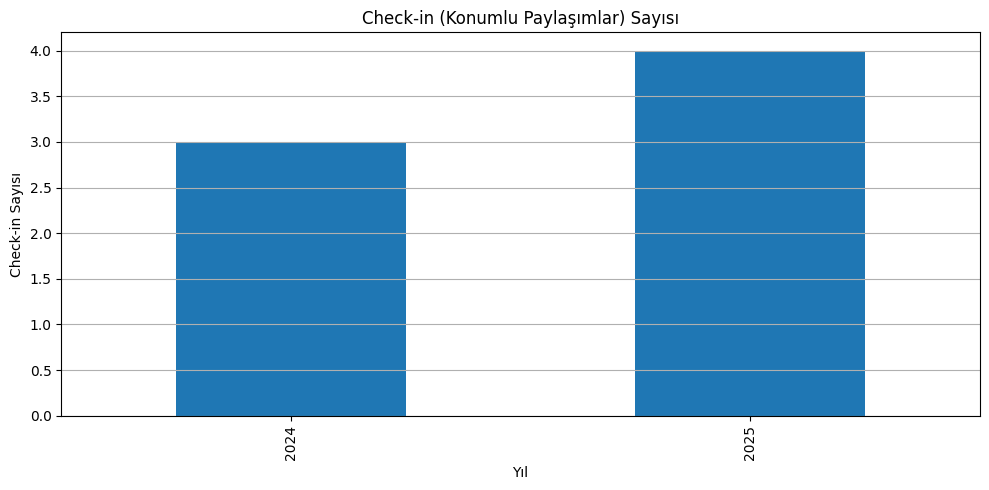

In [ ]:
with open("/content/facebook_extracted/your_facebook_activity/posts/your_posts__check_ins__photos_and_videos_1.json", "r", encoding="utf-8") as f:
    checkin_data = json.load(f)

checkin_years = [datetime.fromtimestamp(i["timestamp"]).year for i in checkin_data if "timestamp" in i]
pd.Series(checkin_years).value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.title("Check-in (Konumlu Paylaşımlar) Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Check-in Sayısı")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


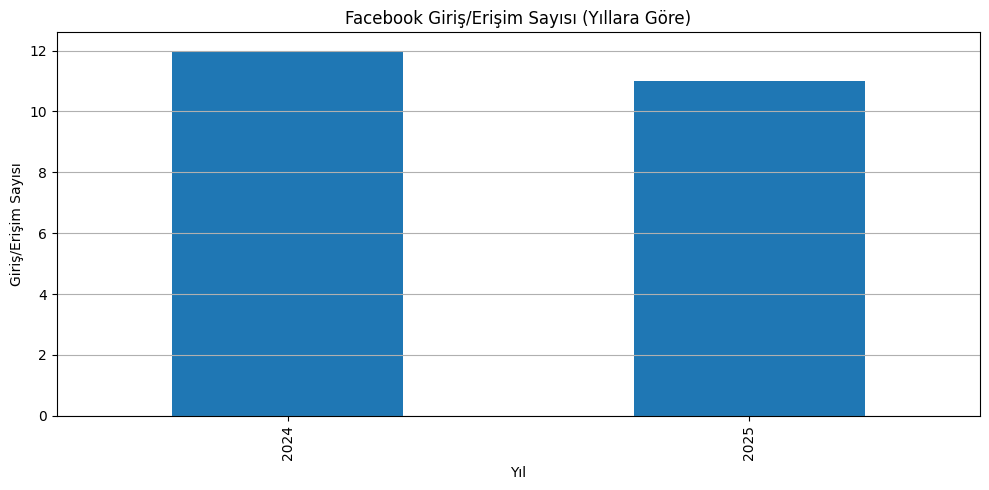

In [ ]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Dosya yolu
file_path = "/content/facebook_extracted/security_and_login_information/logins_and_logouts.json"

# JSON oku
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Boş değilse işleyelim
years = []

if isinstance(data, list):  # Listeyse doğrudan timestamp ararız
    years = [datetime.fromtimestamp(i["timestamp"]).year for i in data if "timestamp" in i]

elif isinstance(data, dict):  # Sözlükse iç listeleri tararız
    for key in data:
        items = data[key]
        if isinstance(items, list):
            for entry in items:
                if "timestamp" in entry:
                    years.append(datetime.fromtimestamp(entry["timestamp"]).year)

# Grafik veya uyarı
if years:
    pd.Series(years).value_counts().sort_index().plot(kind="bar", figsize=(10,5))
    plt.title("Facebook Giriş/Erişim Sayısı (Yıllara Göre)")
    plt.xlabel("Yıl")
    plt.ylabel("Giriş/Erişim Sayısı")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("Geçerli zaman damgası (timestamp) içeren veri bulunamadı.")


In [ ]:
import os

# Drive'ı mount ettiğini varsayıyorum, yoksa bunu çalıştır:
from google.colab import drive
drive.mount('/content/drive')

# Ardından tüm klasörleri listeleyelim
path = '/content/drive/MyDrive/'
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.json'):
            print(os.path.join(root, file))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/secret_conversations.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/omarshikhaleshra_569431074454164/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/bdallh_437056857686521/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/youseefsalamat_1228569905201875/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/muhammednurbekro_446445570080983/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/muhammedahmedsaid_1485262129535815/message_1.json
/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/zaynalabdinalali_1312380763487455/message_1.json
/content/drive/MyDrive/instagram

In [ ]:
import json
from datetime import datetime

instagram_texts = []

# 📨 Instagram mesajları
with open('/content/drive/MyDrive/instagram_data/your_instagram_activity/messages/inbox/youseefsalamat_1228569905201875/message_1.json', encoding='utf-8') as f:
    data = json.load(f)

for msg in data['messages']:
    if 'content' in msg and 'timestamp_ms' in msg:
        timestamp = datetime.fromtimestamp(msg['timestamp_ms'] / 1000)
        if datetime(2024, 1, 1) <= timestamp <= datetime(2024, 12, 31):
            instagram_texts.append(msg['content'])

# 💬 Instagram yorumları
with open('/content/drive/MyDrive/instagram_data/your_instagram_activity/comments/post_comments_1.json', encoding='utf-8') as f:
    comments_data = json.load(f)

for comment in comments_data:
    if 'text' in comment and 'created_at' in comment:
        try:
            timestamp = datetime.strptime(comment['created_at'], "%Y-%m-%dT%H:%M:%S+00:00")
            if datetime(2024, 1, 1) <= timestamp <= datetime(2024, 12, 31):
                instagram_texts.append(comment['text'])
        except:
            continue

# ✅ Hazır içerik listesi
all_texts = instagram_texts
print("Toplam 2024 içerik sayısı:", len(all_texts))


Toplam 2024 içerik sayısı: 83


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Türkçe temel stop-word'ler
stop_words = ['bir', 've', 'çok', 'bu', 'ile', 'ama', 'gibi', 'daha', 'mi', 'ben', 'sen', 'var', 'yok', 'ne', 'de', 'da', 'şu', 'diye', 'o', 'ki']

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)
X = vectorizer.fit_transform(all_texts)

# Kümelere ayır (örnek: 5 ilgi alanı)
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)

# Küme etiketleri
labels = kmeans.labels_

# Her küme için en önemli 5 kelime
terms = vectorizer.get_feature_names_out()
for i in range(5):
    print(f"\n💡 İlgi Alanı {i+1}:")
    cluster_terms = kmeans.cluster_centers_[i].argsort()[-5:][::-1]
    for idx in cluster_terms:
        print(" -", terms[idx])



💡 İlgi Alanı 1:
 - ø¹
 - ø³
 - ø¹ø
 - øªø
 - ø³øªù

💡 İlgi Alanı 2:
 - øªù
 - ø¹ø
 - ø³ù
 - ø²ù
 - øºù

💡 İlgi Alanı 3:
 - ø³ù
 - ø¹ø
 - ø¹ù
 - øªø
 - ø¹

💡 İlgi Alanı 4:
 - ø¹ù
 - ø³
 - øª
 - øªù
 - ø¹ø

💡 İlgi Alanı 5:
 - øª
 - øªù
 - ø¹ù
 - ø³ø
 - ø¹ø


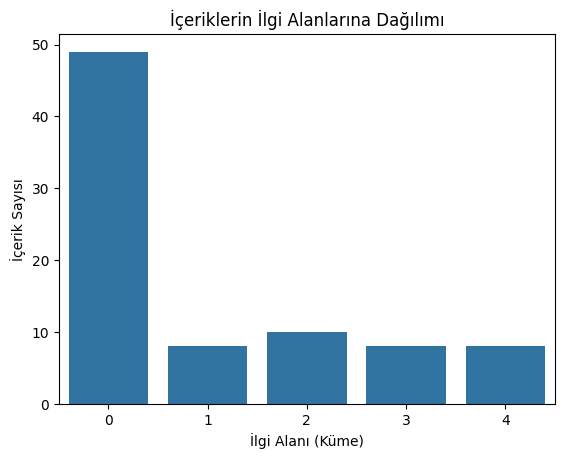

In [ ]:
# Küme dağılım grafiği
sns.countplot(x=labels)
plt.title("İçeriklerin İlgi Alanlarına Dağılımı")
plt.xlabel("İlgi Alanı (Küme)")
plt.ylabel("İçerik Sayısı")
plt.show()